# Ciência de Dados

### Desavio: Previsão de vendas

Nosso desavio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Ciência de Dados:
- Entendimento do Desavio
- Entendimento da Área/Empresa
- Extração/Obtenção de Dados
- Ajuste dos Dados (Tratamento/Limpeza)
- Análise Exploratória
- Modelagem + Algorítimos (I.A.)
- Interpretação dos Resultados

In [58]:
#Importando Dase de Dados
# import numpy as np
import pandas as pd
# import plotly as pl
import seaborn as sns
import matplotlib.pyplot as plt

df_tabela = pd.read_csv('datas/4_advertising.csv')
display(df_tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


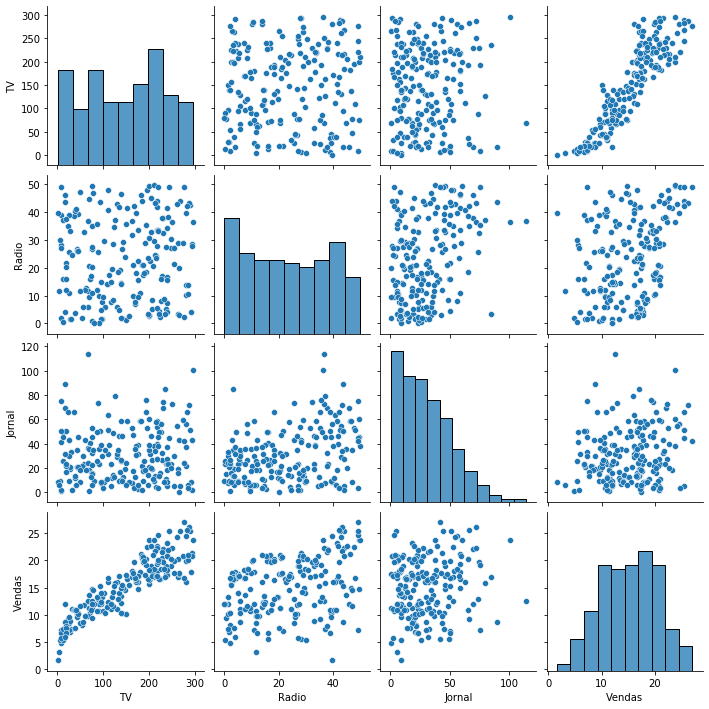

In [59]:
#Criando gráfico com o Saborn
#Exibir o Gráfico com Matplotlib

#Comparação par a par
sns.pairplot(df_tabela)
plt.show()

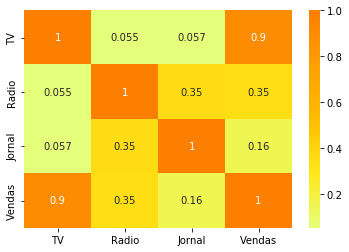

In [60]:
#Criando gráfico com o Saborn
#Exibir o Gráfico com Matplotlib

#Mapa de calor
#Wistia, plasma, YlGnBu
sns.heatmap(df_tabela.corr(), cmap='Wistia', annot=True)
plt.show()

## Treino

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Separar dados/variaveis de previsão (alvo, y) e dados/variáveis de preparação (x)
y = df_tabela['Vendas'] #Dados alvo (que eu quero prever)
x = df_tabela[['TV', 'Radio', 'Jornal']] #Dados que serão usados para fazer a previsão

#Instanciar as variáveis
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#Criando a inteligência artificial
modelo_rl = LinearRegression()
modelo_ad = RandomForestRegressor()

#Treinando a inteligência artificial
modelo_rl.fit(x_treino, y_treino)
modelo_ad.fit(x_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Teste

In [69]:
from sklearn.metrics import r2_score

#Testando a I.A.
prev_rl = modelo_rl.predict(x_teste)
prev_ad = modelo_ad.predict(x_teste)

#Instanciando a "acurácia" da I.A.
rl = r2_score(y_teste, prev_rl)
ad = r2_score(y_teste, prev_ad)

print('-')
print(f'- Regressão Linear: R² = {rl}')
print(f'- Árvore de Decisão: R² = {ad}')
print('-')
print(f'- Regressão Linear: {rl:.2%}')
print(f'- Árvore de Decisão: {ad:.2%}')
print('-')

-
- Regressão Linear: R² = 0.9071151423684273
- Árvore de Decisão: R² = 0.9636244996258212
-
- Regressão Linear: 90.71%
- Árvore de Decisão: 96.36%
-


## Novas Previsões

In [71]:
novos_valores = pd.read_csv('datas/4_novos.csv')
nova_previsão = modelo_ad.predict(novos_valores)
display(novos_valores)
display(nova_previsão)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


array([ 7.683,  8.583, 19.65 ])